<a href="https://colab.research.google.com/github/srirams1983/mlflow-for-gcp/blob/master/pycaret_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 266 kB 35.2 MB/s 
     |████████████████████████████████| 167 kB 34.8 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 113 kB 54.9 MB/s 
     |████████████████████████████████| 261 kB 46.6 MB/s 
     |████████████████████████████████| 6.8 MB 34.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 1.7 MB 25.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 8.9 MB/s 
     |████████████████████████████████| 2.0 MB 42.6 MB/s 
     |████████████████████████████████| 271 kB 72.7 MB/s 
     |████████████████████████████████| 3.1 MB 39.3 MB/s 
     |████████████████████████████████| 62 kB 853 kB/s 
     |█████████████████████

In [2]:
!pip install Flask

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from pycaret.regression import *

In [5]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [6]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9663,3.330203e+07,5770.7905,0.8011,0.4683,0.4153
1,4503.7339,4.374647e+07,6614.1113,0.7456,0.5633,0.4217
2,3880.5540,3.179514e+07,5638.7178,0.5974,0.7645,0.4396
3,3747.6453,2.680531e+07,5177.3843,0.7762,0.5015,0.5175
4,4471.0425,4.341054e+07,6588.6675,0.6771,0.5224,0.3767
5,4182.7573,3.616634e+07,6013.8452,0.7674,0.7416,0.4320
6,4081.1008,3.919260e+07,6260.3994,0.7333,0.6434,0.4241
7,4928.1533,4.641502e+07,6812.8574,0.7448,0.5887,0.4137
8,4609.3130,4.037035e+07,6353.7666,0.7392,0.5686,0.5111
9,4665.8657,4.259680e+07,6526.6221,0.7256,0.8131,0.4802


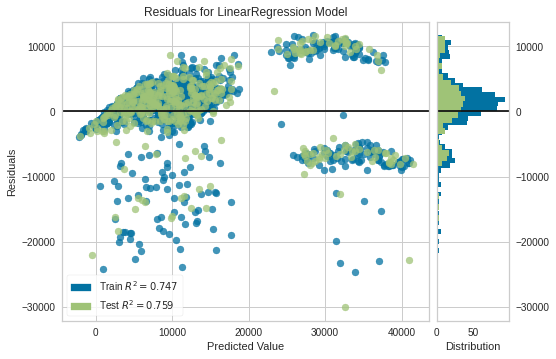

In [7]:

plot_model(lr)

In [8]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [14]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3048.3008,2.135026e+07,4620.6343,0.8725,0.3929,0.3176
1,3514.2993,3.335760e+07,5775.6040,0.8060,0.4395,0.3341
2,3038.9431,2.334749e+07,4831.9238,0.7044,0.5894,0.4070
3,2899.5439,1.941629e+07,4406.3921,0.8379,0.4505,0.3899
4,3260.5881,2.733816e+07,5228.5908,0.7967,0.4604,0.3160
5,3439.8992,2.673739e+07,5170.8213,0.8280,0.4799,0.3091
6,2907.1606,2.511202e+07,5011.1895,0.8291,0.3740,0.3073
7,3544.2087,3.072713e+07,5543.2056,0.8310,0.4755,0.3121
8,3089.1780,2.256284e+07,4750.0356,0.8543,0.3933,0.3282
9,3284.9082,2.887823e+07,5373.8472,0.8140,0.5109,0.3685


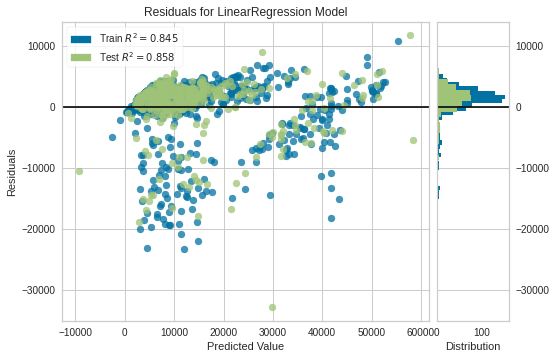

In [15]:
plot_model(lr)

In [16]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [17]:

deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded
